# Proyecto 3
### Integrantes
- Nicolle Gordillo
- Fabiola Contreras
- Sofía Velasquez
- María José Villafuerte

## Analisis Exploratorio

### Descripción del conjunto de datos

In [2]:
# IMPORTACIONES
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# CARGA DE DATASETS
divorcios_df = pd.read_csv("divorcios_limpio.csv")
matrimonios_df = pd.read_csv("matrimonios_limpio.csv")

C:\Users\Fabi\AppData\Local\Temp\ipykernel_6788\3213548938.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  divorcios_df = pd.read_csv("divorcios_limpio.csv")
C:\Users\Fabi\AppData\Local\Temp\ipykernel_6788\3213548938.py:3: DtypeWarning: Columns (16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  matrimonios_df = pd.read_csv("matrimonios_limpio.csv")


In [28]:
# Reemplazar datos ignorados
edad_columns = ["Edad del Hombre", "Edad de la Mujer"]
divorcios_df[edad_columns] = divorcios_df[edad_columns].replace(999, np.nan)
matrimonios_df[edad_columns] = matrimonios_df[edad_columns].replace(999, np.nan)

matrimonios_df["Numero de Nupcias del Hombre"] = matrimonios_df["Numero de Nupcias del Hombre"].replace(9, np.nan)
matrimonios_df["Numero de Nupcias de la Mujer"] = matrimonios_df["Numero de Nupcias de la Mujer"].replace(9, np.nan)

# Reemplazar "IGNORADO" y "NEOG" por NaN en las columnas de ocupación
ocupacion_columns = ['Ocupacion del Hombre', 'Ocupacion de la Mujer']
divorcios_df[ocupacion_columns] = divorcios_df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)
matrimonios_df[ocupacion_columns] = matrimonios_df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)

# Quitar guiones en municipios
matrimonios_df["Municipio de Ocurrencia"] = matrimonios_df["Municipio de Ocurrencia"].str.replace("-", "", regex=True)

In [5]:
# Resumen general: número de variables y observaciones por dataset
divorcios_shape = divorcios_df.shape
matrimonios_shape = matrimonios_df.shape

# Tipos de variables
divorcios_types = divorcios_df.dtypes
matrimonios_types = matrimonios_df.dtypes

(divorcios_shape, divorcios_types, matrimonios_shape, matrimonios_types)

((76669, 19),
 Departamento de Registro             float64
 Municipio de Registro                  int64
 Mes de Registro                      float64
 Ano de Registro                      float64
 Dia de la Ocurrencia                 float64
 Mes de la Ocurrencia                 float64
 Ano Ocurrencia                       float64
 Departamento de Ocurrencia           float64
 Municipio de Ocurrencia                int64
 Edad del Hombre                      float64
 Edad de la Mujer                     float64
 Nacionalidad del Hombre              float64
 Nacionalidad de la Mujer             float64
 Escolaridad del Hombre               float64
 Escolaridad de la Mujer              float64
 Ocupacion del Hombre                  object
 Ocupacion de la Mujer                 object
 Pueblo de Pertenencia del Hombre     float64
 Pueblo de Pertenencia de la Mujer    float64
 dtype: object,
 (832242, 23),
 Departamento de Registro             float64
 Municipio de Registro             

Estadísticas básicas de las variables numéricas

In [6]:
# Dataset divorcios
matrimonios_df.describe() 
divorcios_df.describe() 

,Departamento de Registro,Municipio de Registro,Mes de Registro,Ano de Registro,Dia de la Ocurrencia,Mes de la Ocurrencia,Ano Ocurrencia,Departamento de Ocurrencia,Municipio de Ocurrencia,Edad del Hombre,Edad de la Mujer,Nacionalidad del Hombre,Nacionalidad de la Mujer,Escolaridad del Hombre,Escolaridad de la Mujer,Pueblo de Pertenencia del Hombre,Pueblo de Pertenencia de la Mujer
count,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,65552.000000,76669.000000,76669.000000,42096.000000,42148.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000,76669.000000
mean,7.790137,783.952380,6.553874,2018.880251,15.750603,6.305560,2019.555223,8.025330,808.115627,36.349012,33.192488,360.465703,361.807262,5.570935,5.533853,6.222985,6.249527
std,6.978000,698.461718,3.404897,3.224580,8.678669,3.305056,2.614229,7.016503,702.143049,9.955368,9.107861,603.601280,611.713141,3.173225,3.177932,2.835524,2.812197
min,1.000000,101.000000,1.000000,2013.000000,1.000000,1.000000,2015.000000,1.000000,101.000000,17.000000,15.000000,10.000000,32.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,101.000000,4.000000,2016.000000,8.000000,3.000000,2017.000000,1.000000,103.000000,29.000000,27.000000,320.000000,320.000000,3.000000,3.000000,4.000000,4.000000
50%,6.000000,601.000000,7.000000,2019.000000,16.000000,6.000000,2020.000000,6.000000,614.000000,34.000000,31.000000,320.000000,320.000000,4.000000,4.000000,4.000000,5.000000
75%,13.000000,1301.000000,10.000000,2022.000000,23.000000,9.000000,2022.000000,13.000000,1314.000000,41.000000,38.000000,320.000000,320.000000,9.000000,9.000000,9.000000,9.000000
max,22.000000,2217.000000,12.000000,2024.000000,31.000000,12.000000,2023.000000,22.000000,2217.000000,98.000000,81.000000,9999.000000,9999.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
# Matrimonios
matrimonios_df.describe() 

,Departamento de Registro,Municipio de Registro,Mes de Registro,Ano de Registro,Ano Ocurrencia,Clase de Union,Numero de Nupcias del Hombre,Numero de Nupcias de la Mujer,Edad del Hombre,Edad de la Mujer,Pueblo de Pertenencia del Hombre,Pueblo de Pertenencia de la Mujer,Nacionalidad del Hombre,Nacionalidad de la Mujer,Escolaridad del Hombre,Escolaridad de la Mujer,Departamento de Ocurrencia,Dia de la Ocurrencia,Mes de la Ocurrencia,Area Geografica de la Ocurrencia
count,832242.000000,832242.000000,832242.000000,832242.000000,671996.000000,832242.000000,213899.000000,213998.000000,832115.000000,832080.000000,832242.000000,832242.000000,832242.000000,832242.000000,832242.00000,832242.000000,832242.000000,832242.000000,832242.000000,380630.000000
mean,9.579895,965.483121,6.470238,2018.069674,2019.041819,2.965339,1.013619,1.007958,29.981531,27.013973,3.266632,3.443963,322.271840,321.967771,3.05759,3.117449,9.589712,16.052043,6.697891,2.126033
std,6.396578,640.256366,3.593166,3.219232,2.609263,0.918205,0.118810,0.090829,11.388806,9.966577,2.106755,2.287599,46.021786,41.938488,1.62841,1.930229,6.382463,8.629011,3.599157,2.625505
min,1.000000,101.000000,1.000000,2013.000000,2015.000000,1.000000,1.000000,1.000000,14.000000,12.000000,1.000000,1.000000,8.000000,8.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,401.000000,3.000000,2015.000000,2017.000000,3.000000,1.000000,1.000000,23.000000,20.000000,1.000000,1.000000,320.000000,320.000000,2.00000,2.000000,4.000000,9.000000,3.000000,1.000000
50%,10.000000,1003.000000,6.000000,2018.000000,2019.000000,3.000000,1.000000,1.000000,27.000000,24.000000,4.000000,4.000000,320.000000,320.000000,3.00000,3.000000,10.000000,16.000000,7.000000,1.000000
75%,14.000000,1418.000000,10.000000,2021.000000,2021.000000,3.000000,1.000000,1.000000,33.000000,30.000000,4.000000,4.000000,320.000000,320.000000,4.00000,4.000000,14.000000,23.000000,10.000000,1.000000
max,22.000000,2217.000000,12.000000,2024.000000,2023.000000,9.000000,4.000000,4.000000,99.000000,99.000000,9.000000,9.000000,9999.000000,9999.000000,9.00000,9.000000,22.000000,31.000000,12.000000,11.000000


Valores nulos

Edad del Hombre          34573
Edad de la Mujer         34521
Ano Ocurrencia           11117
Ocupacion de la Mujer     8913
Ocupacion del Hombre      6281
dtype: int64


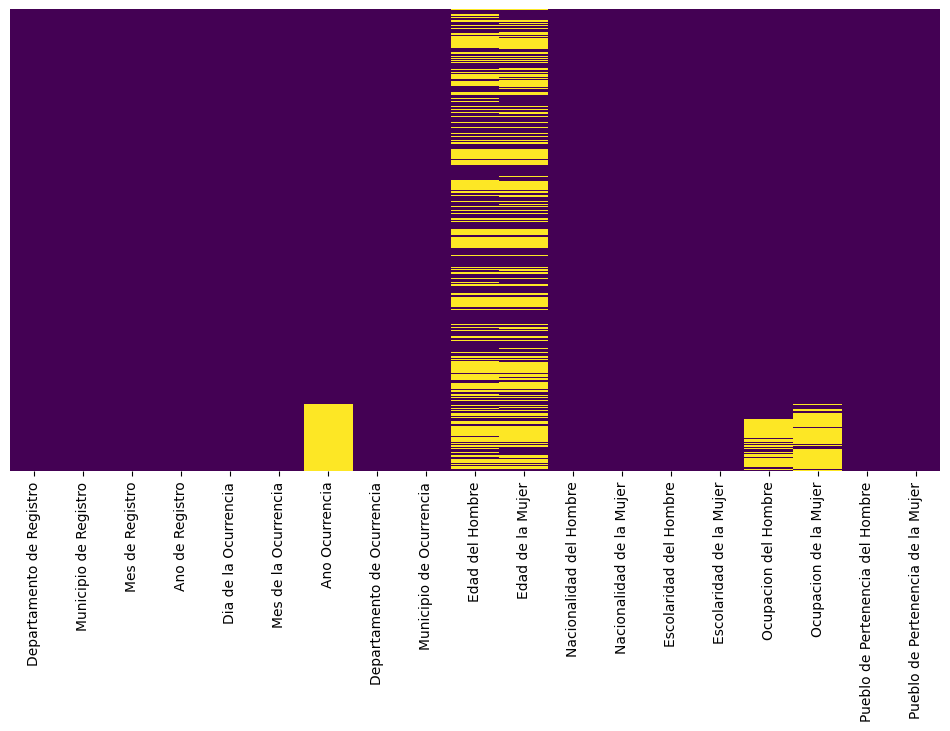

In [8]:
# Divorcios
missing_values = divorcios_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)
plt.figure(figsize=(12,6))
sns.heatmap(divorcios_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

Municipio de Ocurrencia             720896
Numero de Nupcias del Hombre        618343
Numero de Nupcias de la Mujer       618244
Area Geografica de la Ocurrencia    451612
Ano Ocurrencia                      160246
Ocupacion de la Mujer               129437
Ocupacion del Hombre                 37089
Edad de la Mujer                       162
Edad del Hombre                        127
dtype: int64


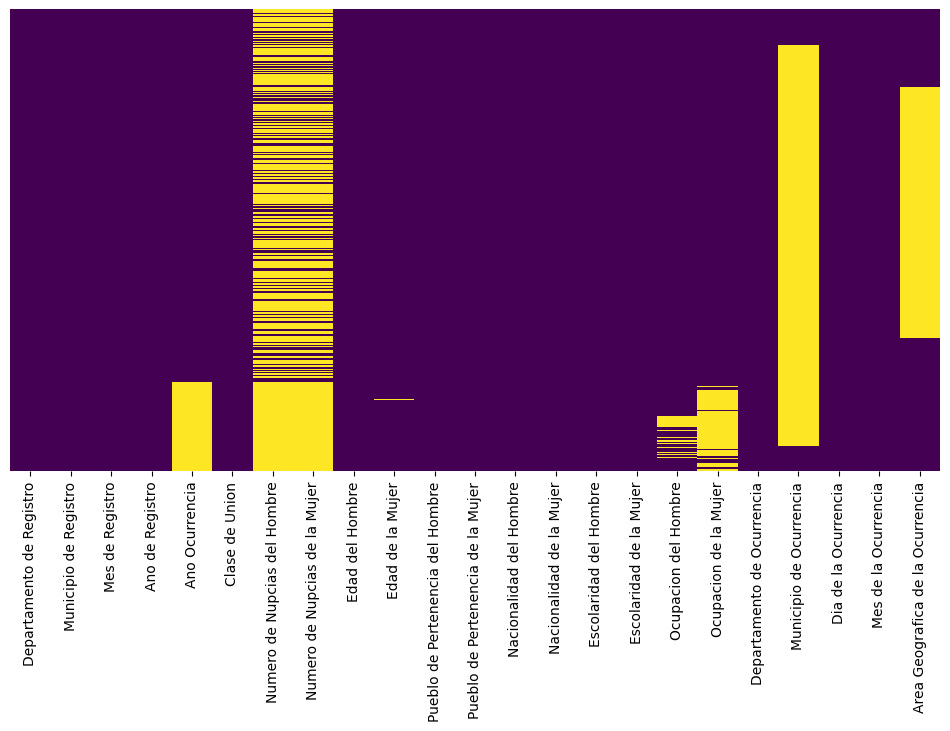

In [9]:
# Matrimonios
missing_values = matrimonios_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)
plt.figure(figsize=(12,6))
sns.heatmap(matrimonios_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

### Resumen de las variables 

In [10]:
# Variables cuantitativas
matrimonios_cuantitativas = [
    "Mes de Registro",
    "Ano de Registro",
    "Ano Ocurrencia",
    "Numero de Nupcias del Hombre",
    "Numero de Nupcias de la Mujer",
    "Edad del Hombre",
    "Edad de la Mujer",
    "Dia de la Ocurrencia",
    "Mes de la Ocurrencia"
]

divorcios_cuantitativas = [
    "Mes de Registro",
    "Ano de Registro",
    "Dia de la Ocurrencia",
    "Mes de la Ocurrencia",
    "Ano Ocurrencia",
    "Edad del Hombre",
    "Edad de la Mujer"
]

# Variables categóricas
matrimonios_categoricas = [
    "Departamento de Registro",
    "Municipio de Registro",
    "Clase de Union",
    "Pueblo de Pertenencia del Hombre",
    "Pueblo de Pertenencia de la Mujer",
    "Nacionalidad del Hombre",
    "Nacionalidad de la Mujer",
    "Escolaridad del Hombre",
    "Escolaridad de la Mujer",
    "Ocupacion del Hombre",
    "Ocupacion de la Mujer",
    "Departamento de Ocurrencia",
    "Municipio de Ocurrencia",
    "Area Geografica de la Ocurrencia"
]

divorcios_categoricas = [
    "Departamento de Registro",
    "Municipio de Registro",
    "Departamento de Ocurrencia",
    "Municipio de Ocurrencia",
    "Nacionalidad del Hombre",
    "Nacionalidad de la Mujer",
    "Escolaridad del Hombre",
    "Escolaridad de la Mujer",
    "Ocupacion del Hombre",
    "Ocupacion de la Mujer",
    "Pueblo de Pertenencia del Hombre",
    "Pueblo de Pertenencia de la Mujer"
]

Resumenes númericos

In [11]:
# Variables numéricas y categóricas
div_numeric = divorcios_df[divorcios_cuantitativas]
div_cat = divorcios_df[divorcios_categoricas]

mat_numeric = matrimonios_df[matrimonios_cuantitativas]
mat_cat = matrimonios_df[matrimonios_categoricas]
# Descripción numérica
print("\n### Estadísticas descriptivas - divorcios_df")
print(div_numeric.describe())

print("\n### Estadísticas descriptivas - matrimonios_df")
print(mat_numeric.describe())


### Estadísticas descriptivas - divorcios_df
       Mes de Registro  Ano de Registro  Dia de la Ocurrencia  \
count     76669.000000     76669.000000          76669.000000   
mean          6.553874      2018.880251             15.750603   
std           3.404897         3.224580              8.678669   
min           1.000000      2013.000000              1.000000   
25%           4.000000      2016.000000              8.000000   
50%           7.000000      2019.000000             16.000000   
75%          10.000000      2022.000000             23.000000   
max          12.000000      2024.000000             31.000000   

       Mes de la Ocurrencia  Ano Ocurrencia  Edad del Hombre  Edad de la Mujer  
count          76669.000000    65552.000000     42096.000000      42148.000000  
mean               6.305560     2019.555223        36.349012         33.192488  
std                3.305056        2.614229         9.955368          9.107861  
min                1.000000     2015.000000 

Distribución de Variables Numéricas

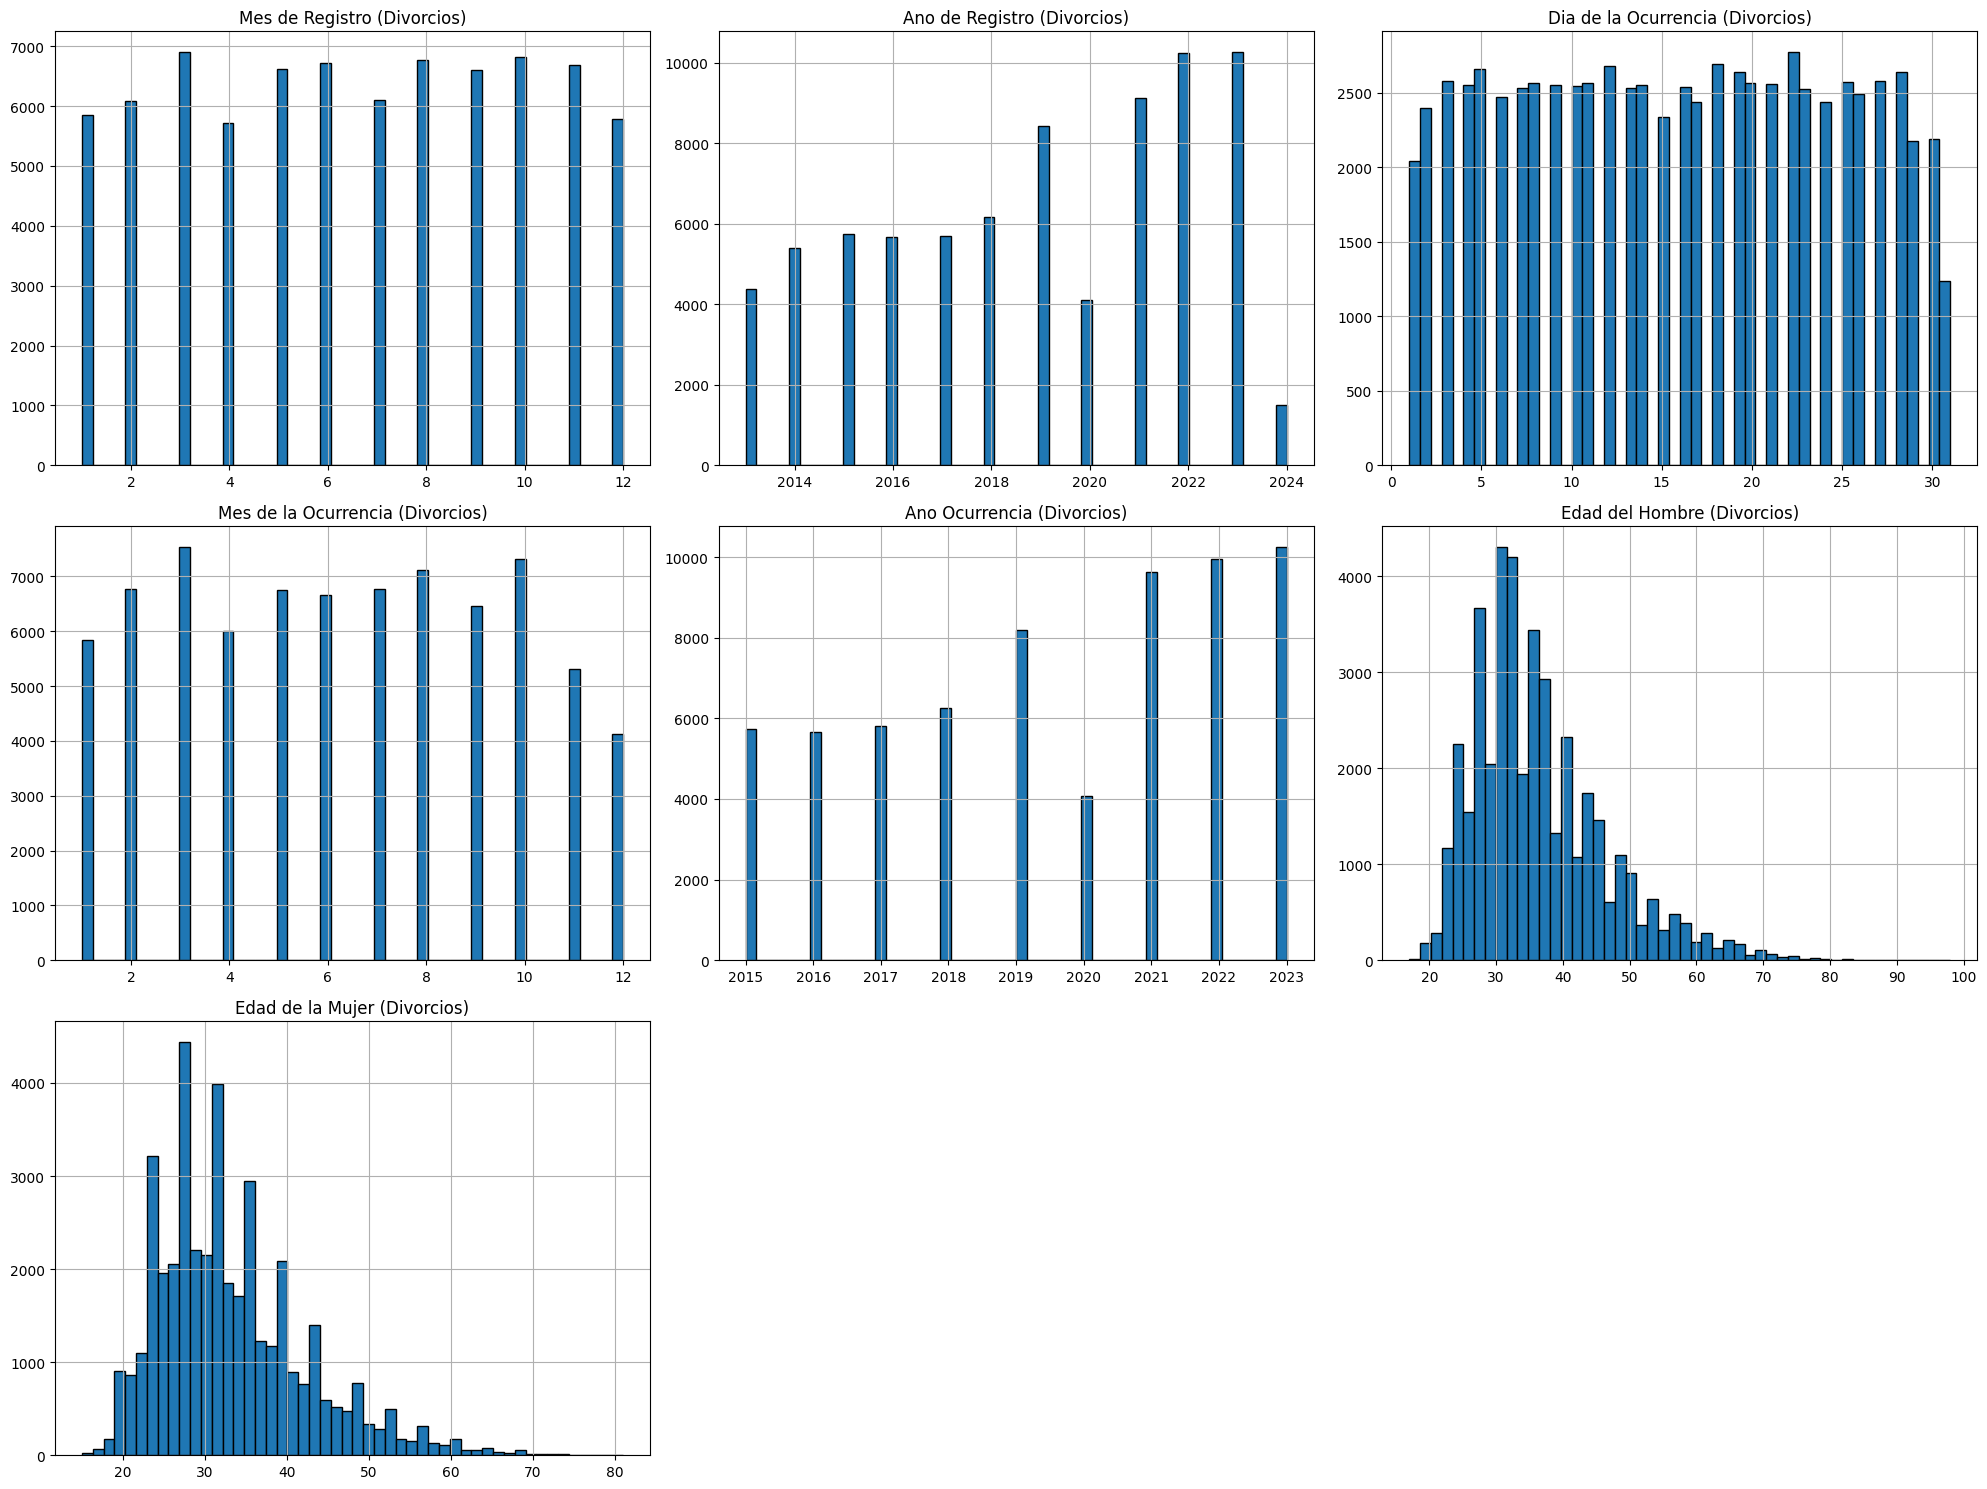

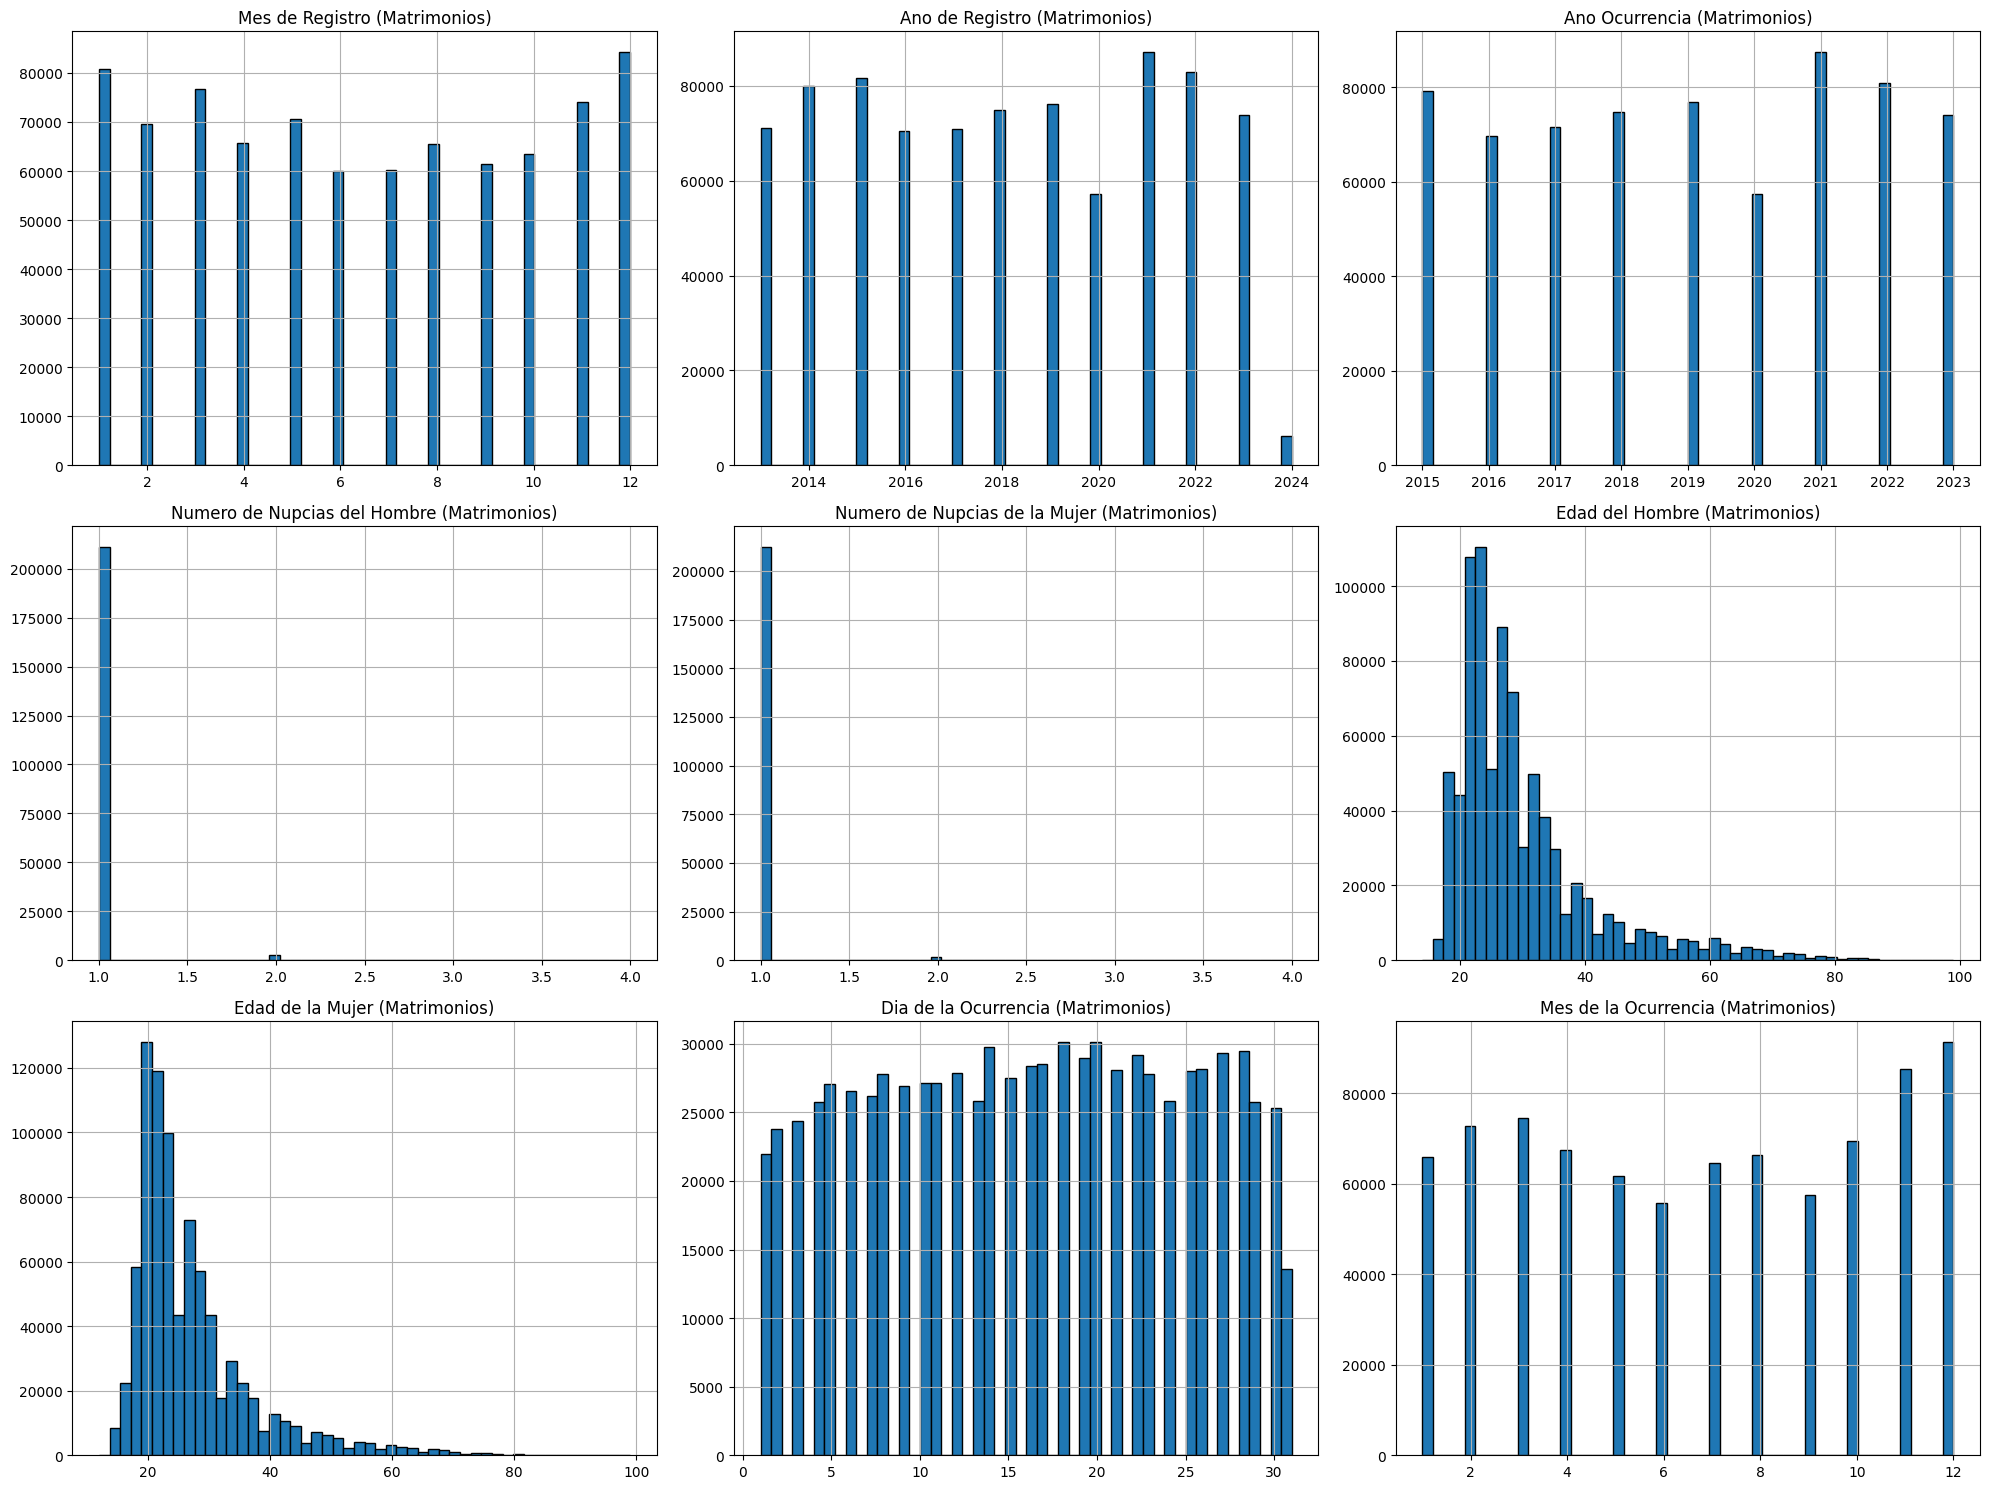

In [12]:
def graficar_histogramas(df_numeric, titulo_dataset):
    cols = 3
    rows = (len(df_numeric.columns) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(df_numeric.columns):
        df_numeric[col].hist(ax=axes[i], bins=50, edgecolor="black")
        axes[i].set_title(f"{col} ({titulo_dataset})")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

graficar_histogramas(div_numeric, "Divorcios")
graficar_histogramas(mat_numeric, "Matrimonios")


Análisis de Variables Categóricas

In [13]:
# TABLAS DE FRECUENCIA (CATEGÓRICAS)
print("\n### Frecuencias - Variables Categóricas divorcios_df")
for col in div_cat.columns:
    print(f"\n{col}:\n{div_cat[col].value_counts().head()}")

print("\n### Frecuencias - Variables Categóricas matrimonios_df")
for col in mat_cat.columns:
    print(f"\n{col}:\n{mat_cat[col].value_counts().head()}")


### Frecuencias - Variables Categóricas divorcios_df

Departamento de Registro:
Departamento de Registro
1.0     29160
9.0      6546
5.0      3369
12.0     3071
22.0     2732
Name: count, dtype: int64

Municipio de Registro:
Municipio de Registro
101     22280
901      3017
115      1851
2101     1812
1801     1516
Name: count, dtype: int64

Departamento de Ocurrencia:
Departamento de Ocurrencia
1.0     27790
9.0      5933
5.0      3817
12.0     3472
22.0     3268
Name: count, dtype: int64

Municipio de Ocurrencia:
Municipio de Ocurrencia
101    18396
108     2394
901     2214
115     2076
920     1325
Name: count, dtype: int64

Nacionalidad del Hombre:
Nacionalidad del Hombre
320.0     75198
840.0       302
9999.0      298
222.0       166
720.0        82
Name: count, dtype: int64

Nacionalidad de la Mujer:
Nacionalidad de la Mujer
320.0     75101
840.0       379
9999.0      306
222.0       264
340.0       108
Name: count, dtype: int64

Escolaridad del Hombre:
Escolaridad del Hombre
9

### Correlación entre variables

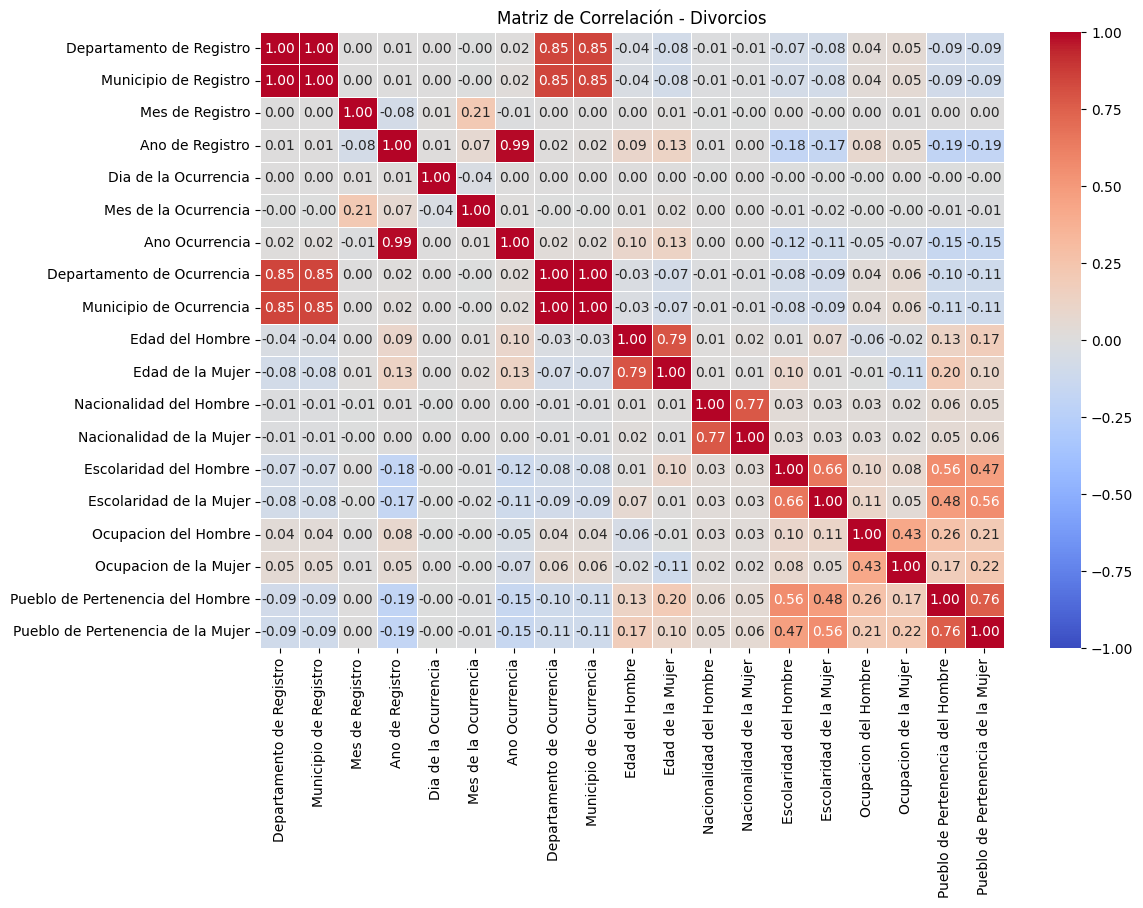

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(divorcios_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title("Matriz de Correlación - Divorcios")
plt.show()

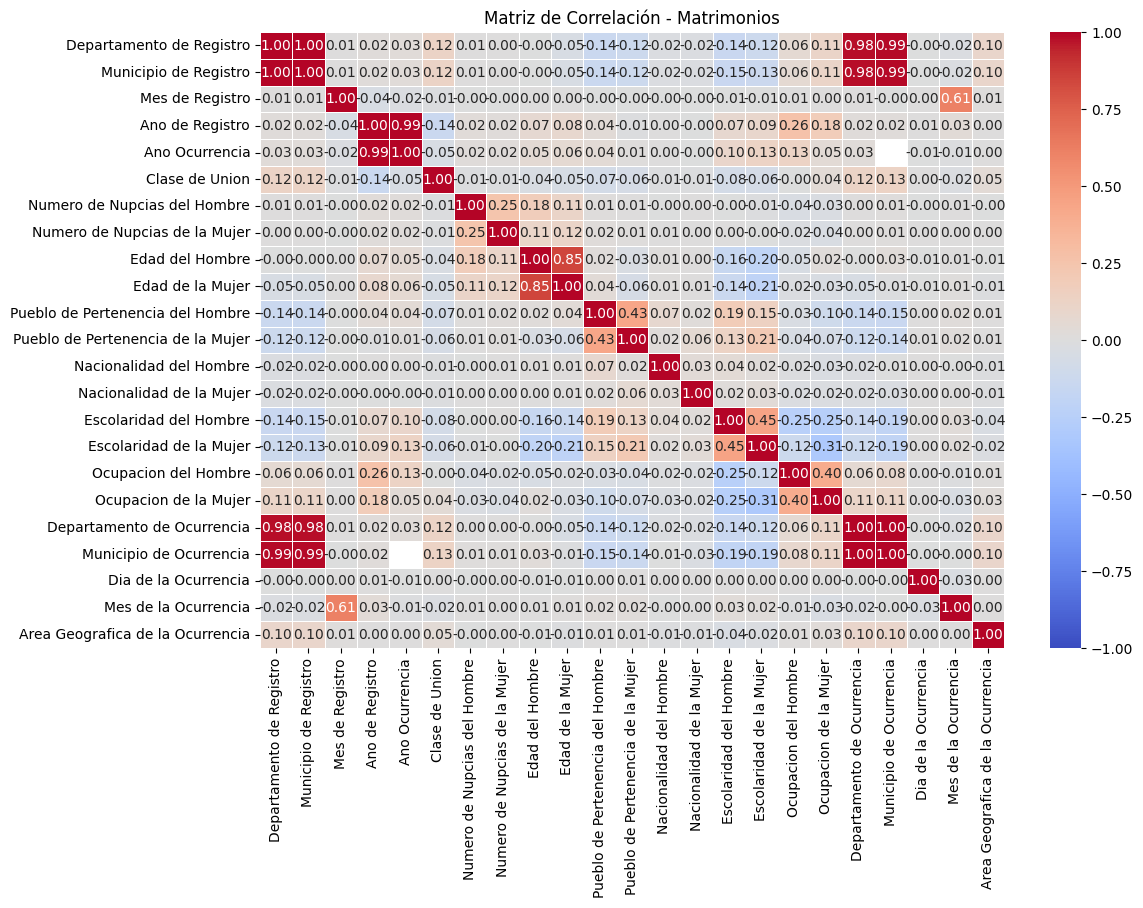

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrimonios_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title("Matriz de Correlación - Matrimonios")
plt.show()

# Clusters

In [3]:
divorcios_df = pd.read_csv("divorcios_limpio.csv")

# Reemplazar "IGNORADO" y "NEOG" por NaN en las columnas de ocupación
ocupacion_columns = ['Ocupacion del Hombre', 'Ocupacion de la Mujer']

# Reemplazar valores "IGNORADO" y "NEOG" por NaN
divorcios_df[ocupacion_columns] = divorcios_df[ocupacion_columns].replace(["IGNORADO", "NEOG"], np.nan)
divorcios_df[ocupacion_columns] = divorcios_df[ocupacion_columns].apply(pd.to_numeric, errors='coerce')

# Mostramos los tipos de datos y eliminamos columnas no numéricas
divorcios_num = divorcios_df.select_dtypes(include=[np.number])

# Visualizamos resumen
print(divorcios_num.shape)
divorcios_num.head()

(76669, 19)


C:\Users\wolfu\AppData\Local\Temp\ipykernel_26508\1696647347.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  divorcios_df = pd.read_csv("divorcios_limpio.csv")


,Departamento de Registro,Municipio de Registro,Mes de Registro,Ano de Registro,Dia de la Ocurrencia,Mes de la Ocurrencia,Ano Ocurrencia,Departamento de Ocurrencia,Municipio de Ocurrencia,Edad del Hombre,Edad de la Mujer,Nacionalidad del Hombre,Nacionalidad de la Mujer,Escolaridad del Hombre,Escolaridad de la Mujer,Ocupacion del Hombre,Ocupacion de la Mujer,Pueblo de Pertenencia del Hombre,Pueblo de Pertenencia de la Mujer
0,1.0,101,12.0,2016.0,3.0,11.0,2016.0,1.0,101,999.0,999.0,32.0,320.0,9.0,9.0,98.0,23.0,9.0,9.0
1,1.0,101,8.0,2016.0,17.0,5.0,2016.0,1.0,101,58.0,999.0,32.0,320.0,9.0,9.0,98.0,98.0,9.0,9.0
2,17.0,1701,8.0,2016.0,11.0,8.0,2016.0,1.0,101,61.0,53.0,32.0,320.0,0.0,0.0,99.0,99.0,9.0,9.0
3,1.0,101,3.0,2017.0,7.0,10.0,2016.0,1.0,101,39.0,38.0,40.0,320.0,9.0,4.0,52.0,26.0,9.0,4.0
4,19.0,1905,2.0,2017.0,23.0,11.0,2016.0,2.0,207,999.0,999.0,152.0,320.0,9.0,9.0,72.0,98.0,9.0,9.0


In [4]:
# Ver resumen estadístico general
print("Edad del Hombre:")
print(divorcios_df["Edad del Hombre"].describe())
print("\nValores únicos más altos:")
print(divorcios_df["Edad del Hombre"].value_counts().sort_index(ascending=False).head(10))

print("\nEdad de la Mujer:")
print(divorcios_df["Edad de la Mujer"].describe())
print("\nValores únicos más altos:")
print(divorcios_df["Edad de la Mujer"].value_counts().sort_index(ascending=False).head(10))


Edad del Hombre:
count    76669.000000
mean       470.445356
std        479.062676
min         17.000000
25%         33.000000
50%         51.000000
75%        999.000000
max        999.000000
Name: Edad del Hombre, dtype: float64

Valores únicos más altos:
Edad del Hombre
999.0    34573
98.0         1
93.0         1
90.0         3
88.0         3
87.0         2
86.0         3
85.0         3
84.0         4
83.0         8
Name: count, dtype: int64

Edad de la Mujer:
count    76669.000000
mean       468.057181
std        480.558945
min         15.000000
25%         30.000000
50%         46.000000
75%        999.000000
max        999.000000
Name: Edad de la Mujer, dtype: float64

Valores únicos más altos:
Edad de la Mujer
999.0    34521
81.0         1
80.0         1
78.0         4
77.0         4
76.0         3
75.0         6
74.0        10
73.0         6
72.0         9
Name: count, dtype: int64


El clustering es sensible a la escala, así que normalizamos los datos:

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Reemplazo condicionado por columna
divorcios_num_clean = divorcios_num.copy()

# Columnas donde 9 es considerado como válido
valid_9_columns = ['Departamento de Registro', 'Mes de Registro', 'Dia de la Ocurrencia', 'Mes de la Ocurrencia', 'Departamento de Ocurrencia']
# Columnas donde 9 es considerado como ignorado
ignore_9_columns = ['Pueblo de Pertenencia del Hombre', 'Pueblo de Pertenencia de la Mujer', 'Escolaridad del Hombre', 'Escolaridad de la Mujer']

# Reemplazar 9 por NaN en las columnas donde 9 debe ser ignorado
divorcios_num_clean[ignore_9_columns] = divorcios_num_clean[ignore_9_columns].replace(9, np.nan)

# Reemplazar 9999 por NaN en las columnas donde 9999 debe ser ignorado
divorcios_num_clean['Nacionalidad del Hombre'] = divorcios_num_clean['Nacionalidad del Hombre'].replace(9999, np.nan)
divorcios_num_clean['Nacionalidad de la Mujer'] = divorcios_num_clean['Nacionalidad de la Mujer'].replace(9999, np.nan)

# Reemplazar 999 por NaN en las columnas donde 999 debe ser ignorado
divorcios_num_clean['Edad del Hombre'] = divorcios_num_clean['Edad del Hombre'].replace(999, np.nan)
divorcios_num_clean['Edad de la Mujer'] = divorcios_num_clean['Edad de la Mujer'].replace(999, np.nan)

# Reemplazar 99 por NaN en las columnas donde 99 debe ser ignorado
divorcios_num_clean['Ocupacion del Hombre'] = divorcios_num_clean['Ocupacion del Hombre'].replace(99, np.nan)
divorcios_num_clean['Ocupacion de la Mujer'] = divorcios_num_clean['Ocupacion de la Mujer'].replace(99, np.nan)

# Ahora se puede imputar y escalar
imputer = SimpleImputer(strategy="mean")  
divorcios_imputed = imputer.fit_transform(divorcios_num_clean)

scaler = StandardScaler()
divorcios_scaled = scaler.fit_transform(divorcios_imputed)


Usamos el método del codo y el coeficiente de silueta:

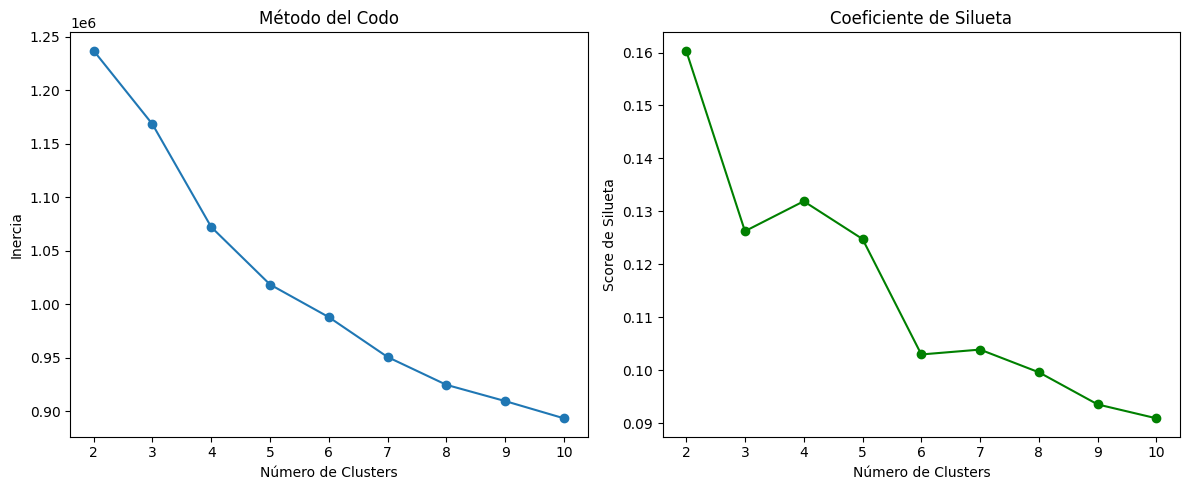

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(divorcios_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(divorcios_scaled, kmeans.labels_))

# Graficamos ambos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")

plt.subplot(1,2,2)
plt.plot(k_range, silhouette, marker='o', color='green')
plt.title("Coeficiente de Silueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Score de Silueta")

plt.tight_layout()
plt.show()

Selecciona el número óptimo:

In [8]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(divorcios_scaled)

# Creamos un nuevo DataFrame a partir de los datos imputados
divorcios_cluster_df = pd.DataFrame(divorcios_imputed, columns=divorcios_num_clean.columns)

# Agregamos los clusters
divorcios_cluster_df["Cluster"] = clusters


Agrupamos por cluster para observar tendencias:

In [9]:
cluster_summary = divorcios_cluster_df.groupby("Cluster").mean(numeric_only=True)
cluster_summary.T  # Transpuesta para mejor lectura

Cluster,0,1,2,3
Departamento de Registro,9.903008,15.426100,2.871108,3.577962
Municipio de Registro,996.726597,1548.301173,291.543504,361.947796
Mes de Registro,6.423454,6.576082,6.626091,6.464056
Ano de Registro,2019.486651,2018.904103,2017.147528,2021.069447
Dia de la Ocurrencia,15.814633,15.683007,15.710469,15.878402
Mes de la Ocurrencia,6.234032,6.307369,6.188193,6.488938
Ano Ocurrencia,2019.879993,2019.629995,2018.258910,2021.156003
Departamento de Ocurrencia,10.205475,15.678292,3.064408,3.827206
Municipio de Ocurrencia,1028.130281,1573.836652,311.607874,387.675367
Edad del Hombre,33.635884,36.272576,35.990077,37.804577


También contamos cuántos casos hay por grupo:

In [10]:
divorcios_cluster_df["Cluster"].value_counts()

Cluster
2    26239
1    25663
3    18849
0     5918
Name: count, dtype: int64

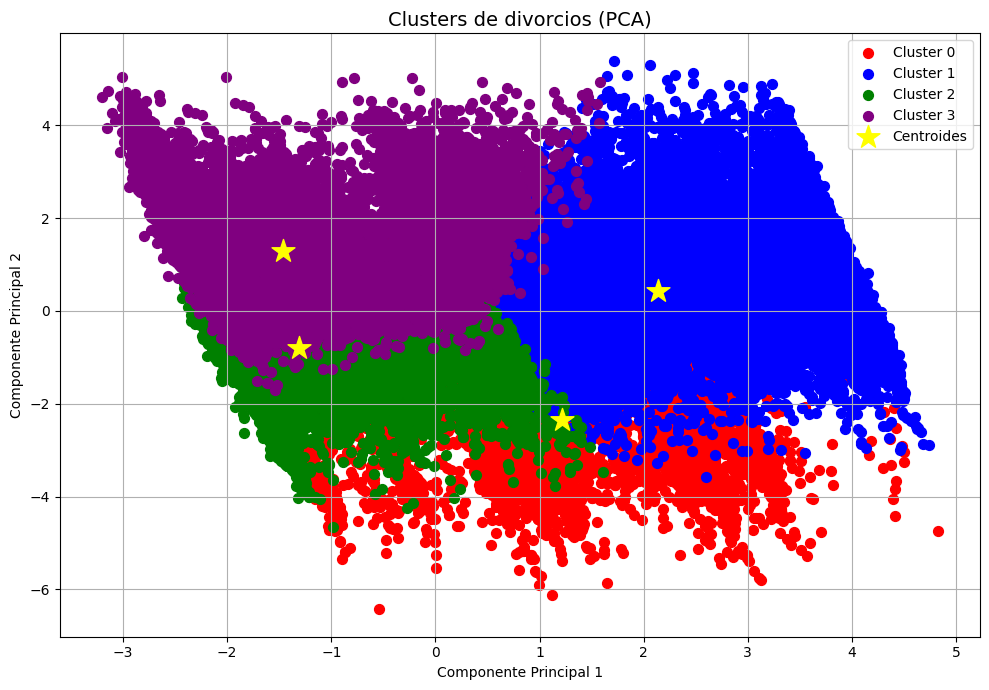

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones para graficar
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(divorcios_scaled)  # datos reducidos

# Proyectar los centroides a 2D también
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Graficar los puntos por cluster
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'purple']

for i in range(optimal_k):
    plt.scatter(X_reduced[clusters == i, 0], X_reduced[clusters == i, 1], 
                s=50, c=colors[i], label=f'Cluster {i}')

# Graficar los centroides
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
            s=300, c='yellow', marker='*', label='Centroides')

# Títulos y etiquetas
plt.title('Clusters de divorcios (PCA)', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()